# Final Project: The Relationship of Greenhouse Gases with Other Climate Change Indicators 

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('retina')
%matplotlib inline

## Part 1: The Global Greenhouse Gases Emissions

#### Reformat the data file 

In [2]:
url1 = 'https://www.epa.gov/sites/production/files/2016-08/global-ghg-emissions_fig-1.csv'
emission_gases1 = pd.read_csv(url1, header = None, skiprows =[0, 1, 2, 3, 4, 5, 6],
                             names=["Years", "Carbon Dioxide", "Methane", "Nitrous oxide", "HFCs, PFCs, and SF6"])
df1 = pd.DataFrame(emission_gases1)
df1 = df1.set_index('Years')
df1

,Carbon Dioxide,Methane,Nitrous oxide,"HFCs, PFCs, and SF6"
Years,,,,
1990,24323.76461,6268.472032,3240.670950,262.076768
1995,25344.56550,6205.020413,3192.851016,290.853735
2000,27349.10122,6324.364859,3143.297834,428.806013
2005,31949.48761,6815.830655,3366.647148,598.233123
2010,34475.63575,7195.561915,3519.556289,672.133564


In [3]:
url2 = 'https://www.epa.gov/sites/production/files/2016-08/global-ghg-emissions_fig-2.csv'
emission_gases2 = pd.read_csv(url2, header = None, skiprows =[0, 1, 2, 3, 4, 5, 6],
                             names=["Years","Energy", "International Transport", "Argriculture", "Industrial processes", "Waste", "Land-use change and forestry"])
df2 = pd.DataFrame(emission_gases2)
df2 = df2.set_index('Years')
df2

,Energy,International Transport,Argriculture,Industrial processes,Waste,Land-use change and forestry
Years,,,,,,
1990,22984.82102,618.69,5621.789900,1125.629523,1148.256669,2595.79721
1995,23726.80578,709.22,5501.831340,1299.907596,1226.137275,2569.36870
2000,25615.00732,836.44,5423.769715,1480.669957,1299.417512,2590.18542
2005,29537.69391,973.43,5798.450564,1981.660095,1378.810375,3060.22361
2010,32677.83564,1096.40,5998.801407,2521.798570,1471.362711,2096.76915


#### Plot the Global Greenhouse Gases Emissions

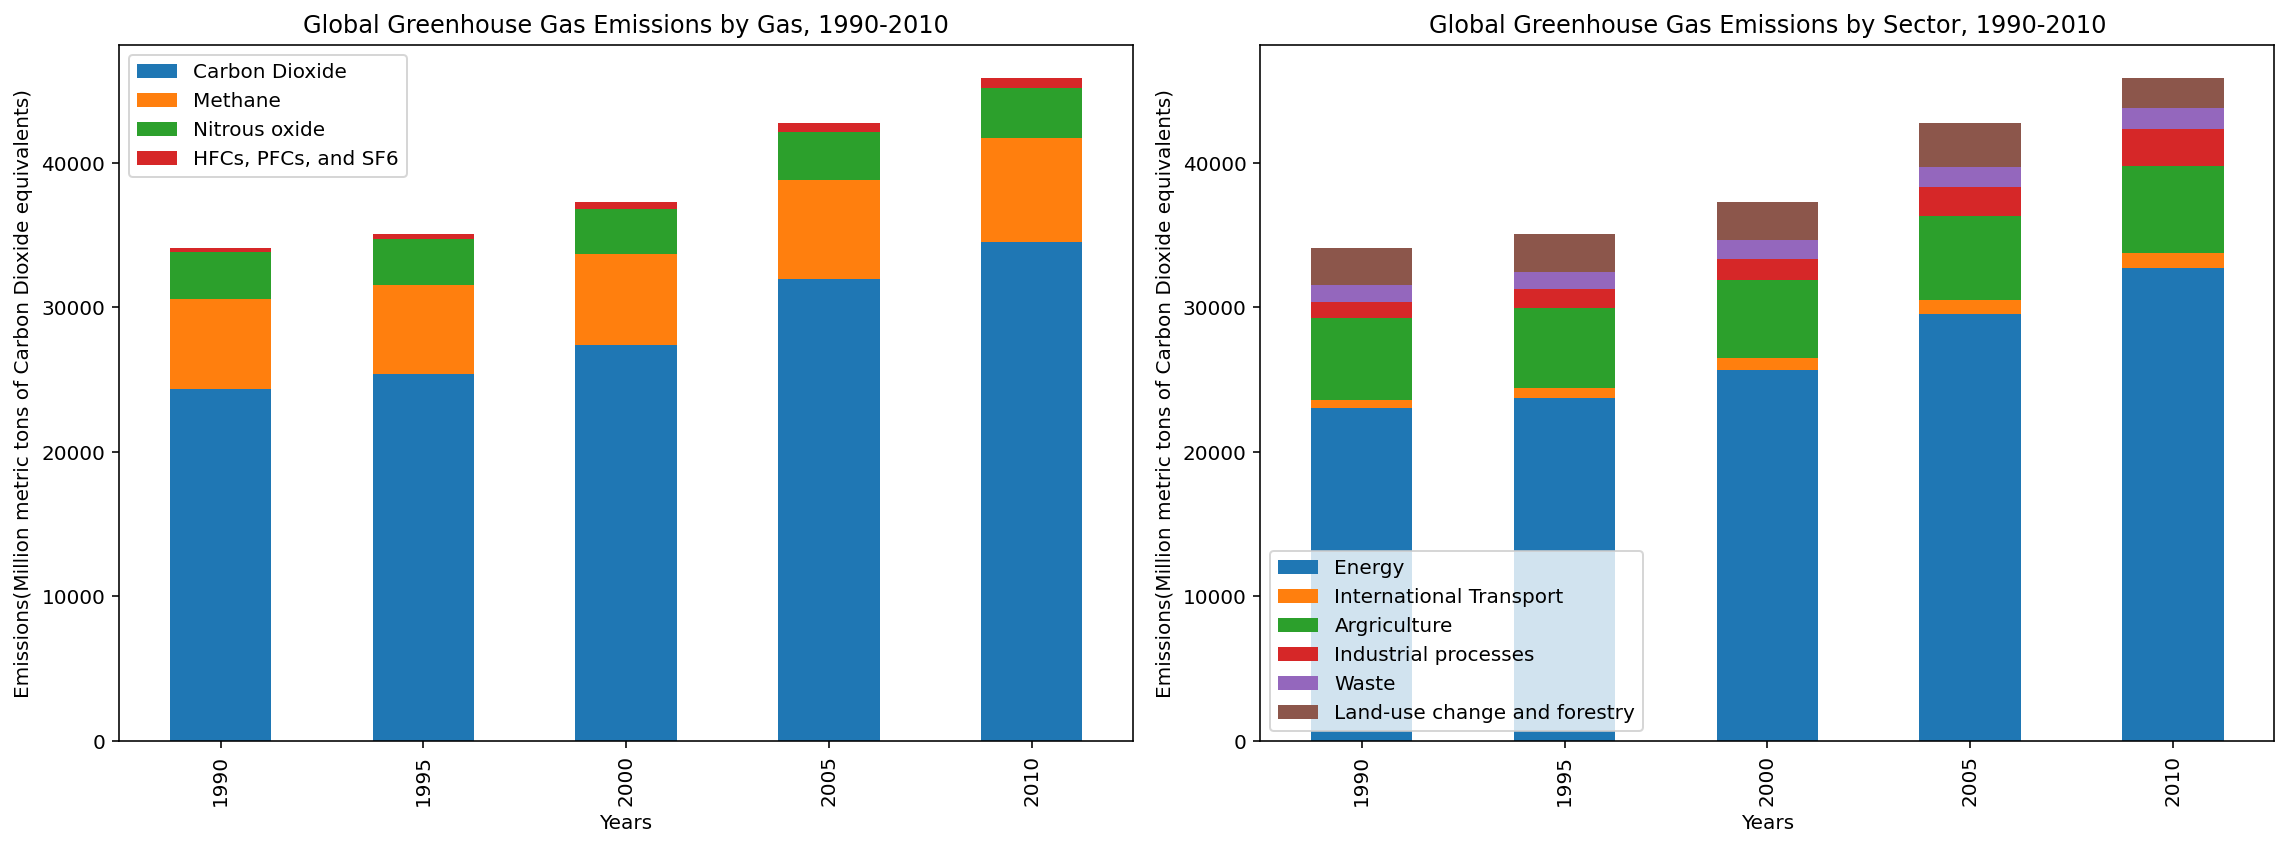

In [4]:
# Plot the 2 datasets: Emissions by gases and by sectors 

fig, axes = plt.subplots(figsize = (16,6), ncols=2)

df1.plot(ax=axes[0], kind='bar',stacked = True,xlabel = 'Years', ylabel = 'Emissions(Million metric tons of Carbon Dioxide equivalents)',
         title = 'Global Greenhouse Gas Emissions by Gas, 1990-2010')

df2.plot(ax=axes[1],kind='bar',stacked = True, xlabel = 'Years', ylabel = 'Emissions(Million metric tons of Carbon Dioxide equivalents)',
         title = 'Global Greenhouse Gas Emissions by Sector, 1990-2010')
plt.legend(loc = 'lower left')

plt.tight_layout()
plt.show()

## Part 2: The Global Annual Mean Concentration and Growth Rates of Greenhouse Gases

#### Load, reformat, and merge the annual mean and growth rates of Methane, 1984 - 2019

In [6]:
# Load the annual mean and growth rates of CH4
ch4_an = pd.read_csv('ch4_annmean_gl.txt', comment = '#', sep="\s+", header=None,
                    names = ['Year', 'Mean_CH4', 'Unc_CH4'])
ch4_an = ch4_an.set_index('Year')
ch4_gr = pd.read_csv('ch4_gr_gl.txt', comment = '#', sep="\s+", header=None,
                    names = ['Year', 'Growth_Rates', 'Unc_GR'])
ch4_gr = ch4_gr.set_index('Year')

# Merge two datasets 
ch4_data = ch4_an.join(ch4_gr, how ='right')
ch4_data.head()

,Mean_CH4,Unc_CH4,Growth_Rates,Unc_GR
Year,,,,
1984,1644.65,0.73,12.80,0.84
1985,1657.26,0.64,12.34,0.91
1986,1670.07,0.81,12.91,0.78
1987,1682.71,0.57,11.37,0.70
1988,1693.08,0.59,10.72,0.55


#### Plot the annual mean and growth rates of Methane, 1984 - 2019

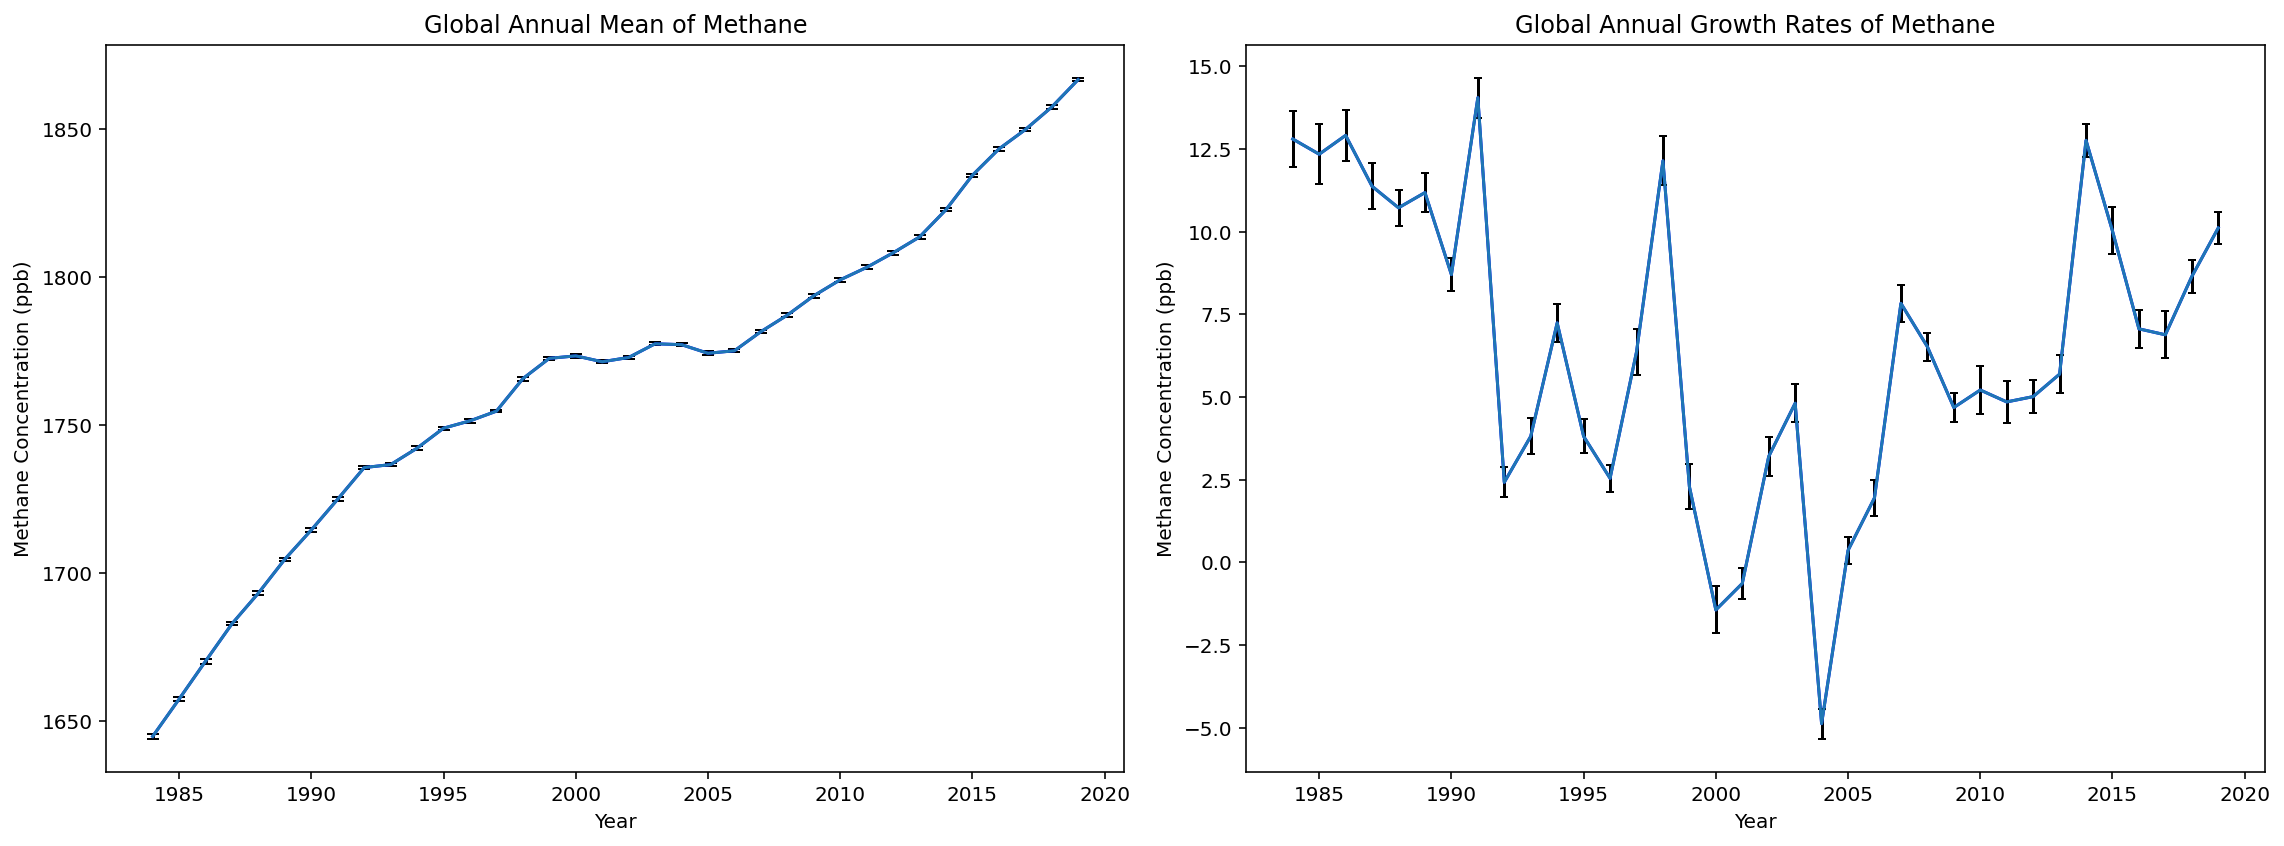

In [7]:
fig, axes = plt.subplots(ncols = 2, figsize= (16,6))

ch4_data.Mean_CH4.plot(ax=axes[0], color = 'blue', yerr = ch4_data.Unc_CH4, xlabel = 'Years', ylabel ='Methane Concentration (ppb)',
                       title = 'Global Annual Mean of Methane')
ch4_data.Mean_CH4.plot(ax=axes[0], yerr = ch4_data.Unc_CH4, capsize =3, capthick = 1, ecolor = 'black')

ch4_data.Growth_Rates.plot(ax=axes[1], color = 'blue', xlabel = 'Years', ylabel ='Methane Concentration (ppb)',
                       title = 'Global Annual Growth Rates of Methane')
ch4_data.Growth_Rates.plot(ax=axes[1], yerr = ch4_data.Unc_GR, capsize = 2, capthick = 1, ecolor = 'black')

plt.tight_layout()
plt.show()

#### Load, reformat, and merge the annual mean and growth rates of Nitrous Oxide, 2001 - 2019

In [8]:
# Load the annual mean and growth rates of N2O
n2o_an = pd.read_csv('n2o_annmean_gl.txt', sep="\s+",comment = '#', header=None,
                    names = ['Year', 'Mean_N2O', 'Unc_N2O'])
n2o_an = n2o_an.set_index('Year')
n2o_gr = pd.read_csv('n2o_gr_gl.txt',  comment = '#', sep="\s+", header=None,
                    names = ['Year', 'Growth_Rates', 'Unc_GR'])
n2o_gr = n2o_gr.set_index('Year')

# Merge two datasets
n2o_data = n2o_an.join(n2o_gr, how ='right')
n2o_data.head()

,Mean_N2O,Unc_N2O,Growth_Rates,Unc_GR
Year,,,,
2001,316.36,0.14,0.71,0.12
2002,316.94,0.14,0.50,0.15
2003,317.62,0.13,0.80,0.15
2004,318.25,0.11,0.53,0.16
2005,318.91,0.12,0.87,0.15


#### Plot the annual mean and growth rates of Nitrous Oxide, 2001 - 2019

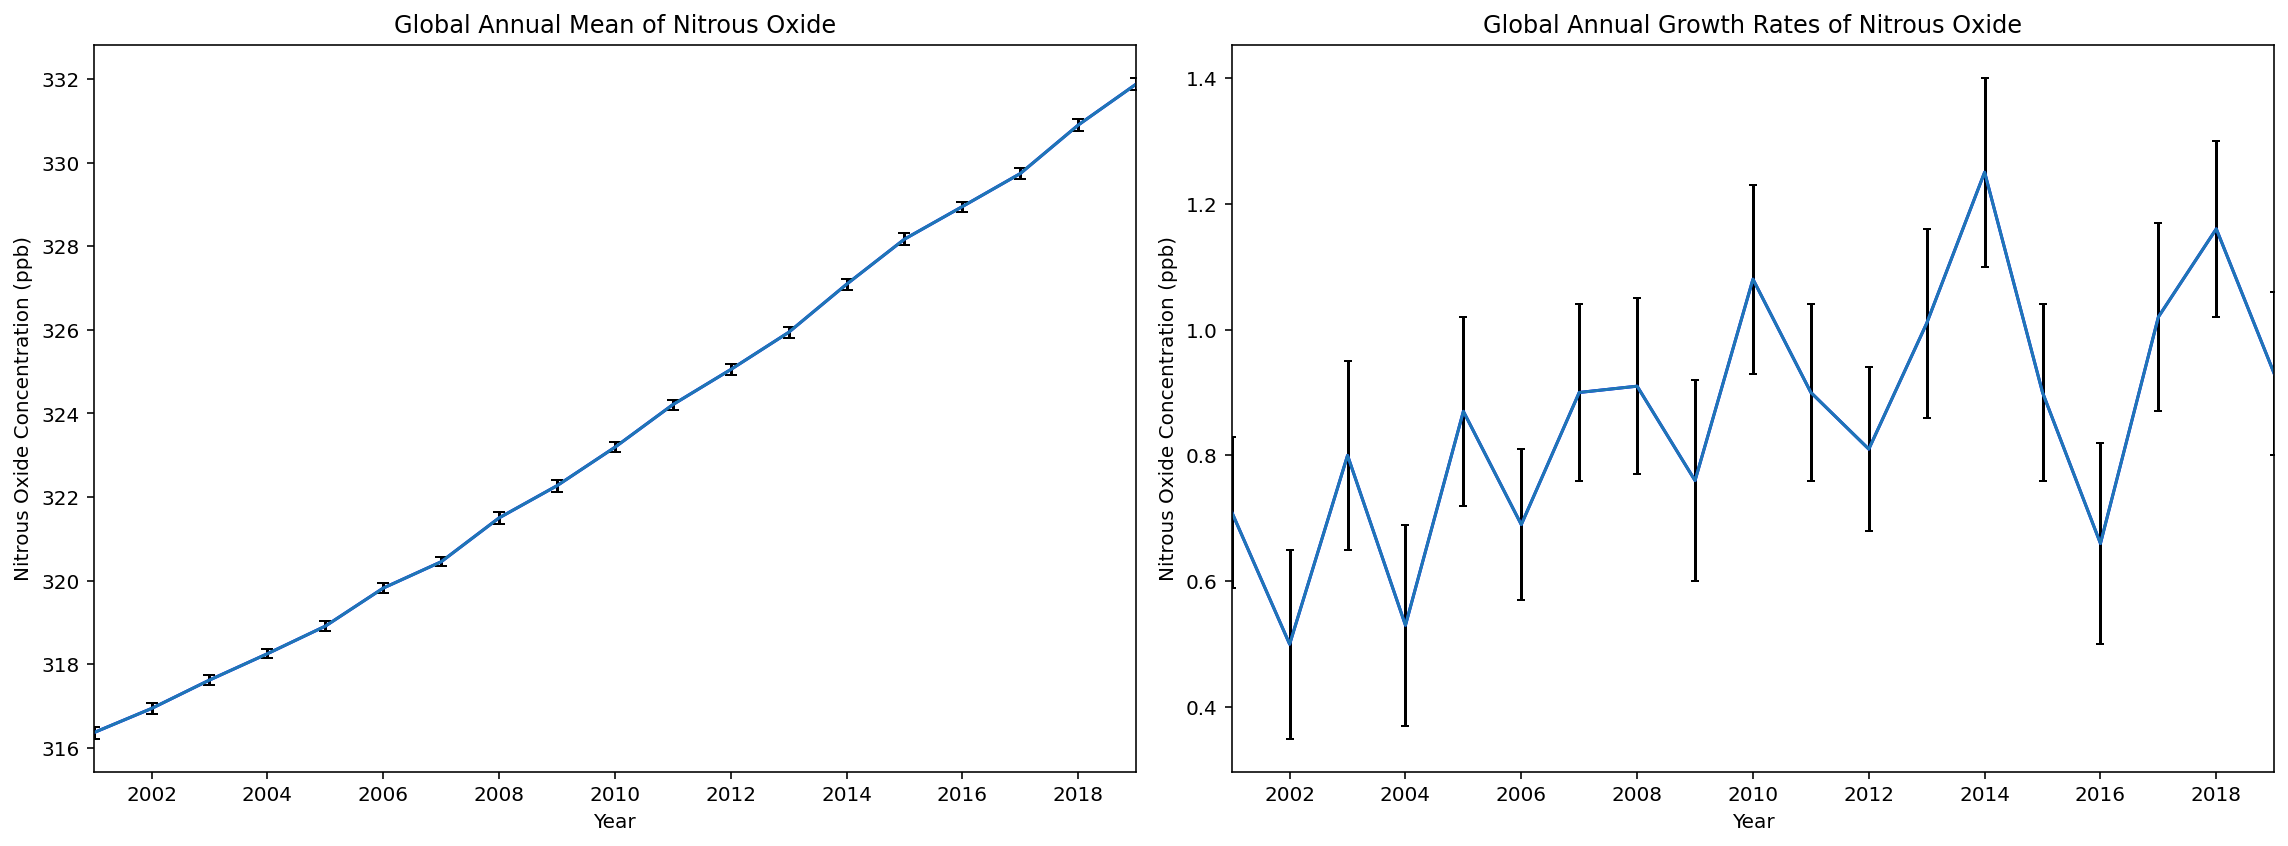

In [9]:
fig, axes = plt.subplots(ncols = 2, figsize= (16,6))

n2o_data.Mean_N2O.plot(ax=axes[0], color = 'blue', xlabel = 'Years', ylabel ='Nitrous Oxide Concentration (ppb)', xlim=(2001,2019),
                       title = 'Global Annual Mean of Nitrous Oxide')
n2o_data.Mean_N2O.plot(ax=axes[0], yerr = n2o_data.Unc_N2O, capsize =3, capthick = 1, ecolor = 'black')

n2o_data.Growth_Rates.plot(ax=axes[1], color = 'blue', xlabel = 'Years', ylabel ='Nitrous Oxide Concentration (ppb)', xlim=(2001,2019),
                       title = 'Global Annual Growth Rates of Nitrous Oxide')
n2o_data.Growth_Rates.plot(ax=axes[1], yerr = n2o_data.Unc_GR, capsize = 2, capthick = 1, ecolor = 'black')

plt.tight_layout()
plt.show()

#### Load, reformat, and merge the annual mean and growth rates of Sulfur Hexafluoride, 1998 - 2019

In [10]:
# Load the annual mean and growth rates of SF6
sf6_an = pd.read_csv('sf6_annmean_gl.txt', comment = '#', sep="\s+", header=None,
                    names = ['Year', 'Mean_SF6', 'Unc_SF6'])
sf6_an = sf6_an.set_index('Year')
sf6_gr = pd.read_csv('sf6_gr_gl.txt', sep="\s+",  comment = '#', header=None,
                    names = ['Year', 'Growth_Rates', 'Unc_GR'])
sf6_gr = sf6_gr.set_index('Year')

# Merge two datasets
sf6_data = sf6_an.join(sf6_gr, how ='right')
sf6_data.head()

,Mean_SF6,Unc_SF6,Growth_Rates,Unc_GR
Year,,,,
1998,4.21,0.003,0.20,0.004
1999,4.38,0.004,0.17,0.004
2000,4.58,0.003,0.20,0.005
2001,4.78,0.004,0.19,0.004
2002,4.98,0.002,0.22,0.004


#### Plot the annual mean and growth rates of Sulfur Hexafluoride, 1998 - 2019

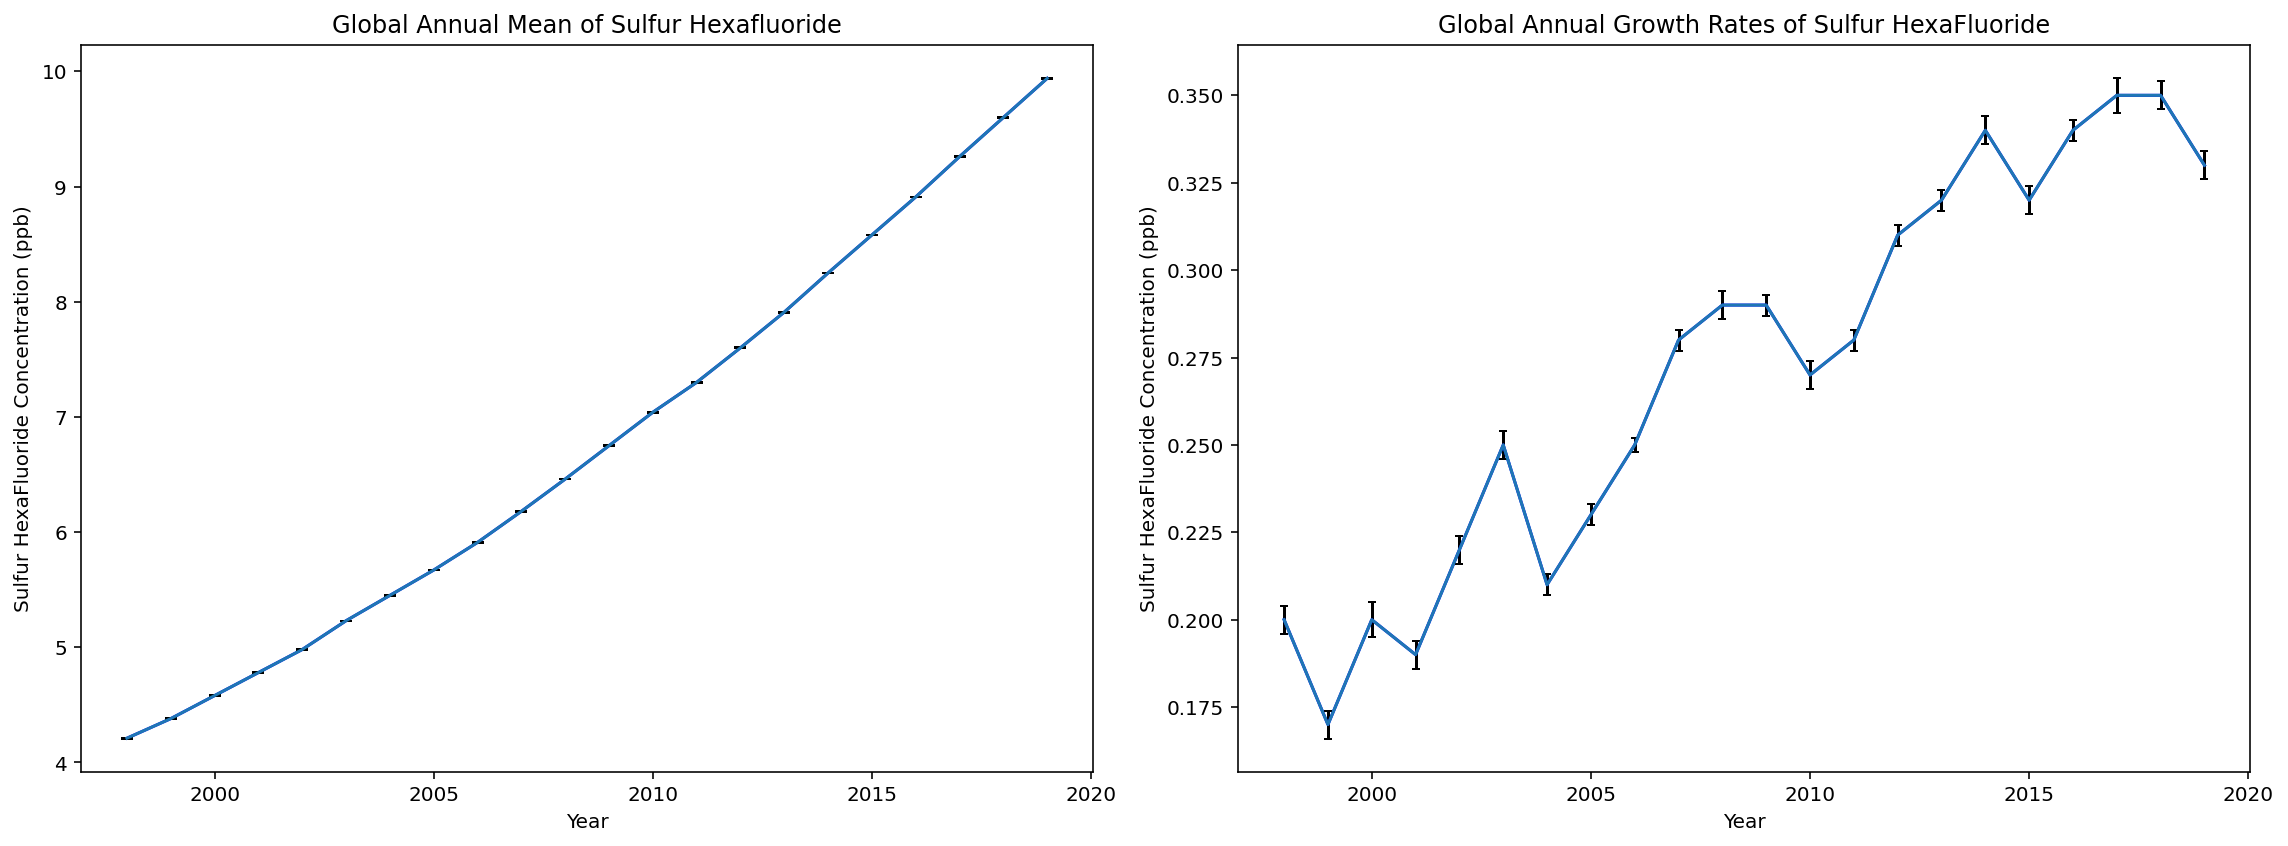

In [11]:
fig, axes = plt.subplots(ncols = 2, figsize= (16,6))

sf6_data.Mean_SF6.plot(ax=axes[0], color = 'blue', xlabel = 'Years', ylabel ='Sulfur HexaFluoride Concentration (ppb)',
                       title = 'Global Annual Mean of Sulfur Hexafluoride')
sf6_data.Mean_SF6.plot(ax=axes[0], yerr = sf6_data.Unc_SF6, capsize =3, capthick = 1, ecolor = 'black')

sf6_data.Growth_Rates.plot(ax=axes[1], color = 'blue', xlabel = 'Years', ylabel ='Sulfur HexaFluoride Concentration (ppb)',
                       title = 'Global Annual Growth Rates of Sulfur HexaFluoride')
sf6_data.Growth_Rates.plot(ax=axes[1], yerr = sf6_data.Unc_GR, capsize = 2, capthick = 1, ecolor = 'black')

plt.tight_layout()
plt.show()

#### Load, reformat, and merge the annual mean of Carbon Dioxide, 1980-2019 and the growth rates of Carbon Dioxide, 1959 - 2019

In [12]:
# Load the annual mean and growth rates of CO2
co2_an = pd.read_csv('co2_annmean_gl.txt', comment = '#', sep="\s+", header=None,
                    names = ['Year', 'Mean_CO2', 'Unc_CO2'])
co2_an = co2_an.set_index('Year')
co2_gr = pd.read_csv('co2_gr_gl.txt', comment = '#', sep="\s+", header=None,
                    names = ['Year', 'Growth_Rates', 'Unc_GR'])
co2_gr = co2_gr.set_index('Year')

# Merge two datasets
co2_data = co2_an.join(co2_gr, how ='right')
co2_data

,Mean_CO2,Unc_CO2,Growth_Rates,Unc_GR
Year,,,,
1959,NaN,NaN,0.96,0.31
1960,NaN,NaN,0.71,0.27
1961,NaN,NaN,0.78,0.27
1962,NaN,NaN,0.56,0.27
1963,NaN,NaN,0.57,0.28
...,...,...,...,...
2015,399.42,0.1,2.96,0.07
2016,402.85,0.1,2.87,0.08
2017,405.00,0.1,2.14,0.09


#### Plot the annual mean of Carbon Dioxide, 1980 - 2019 and the growth rates of Carbon Dioxide, 1959 - 2019

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


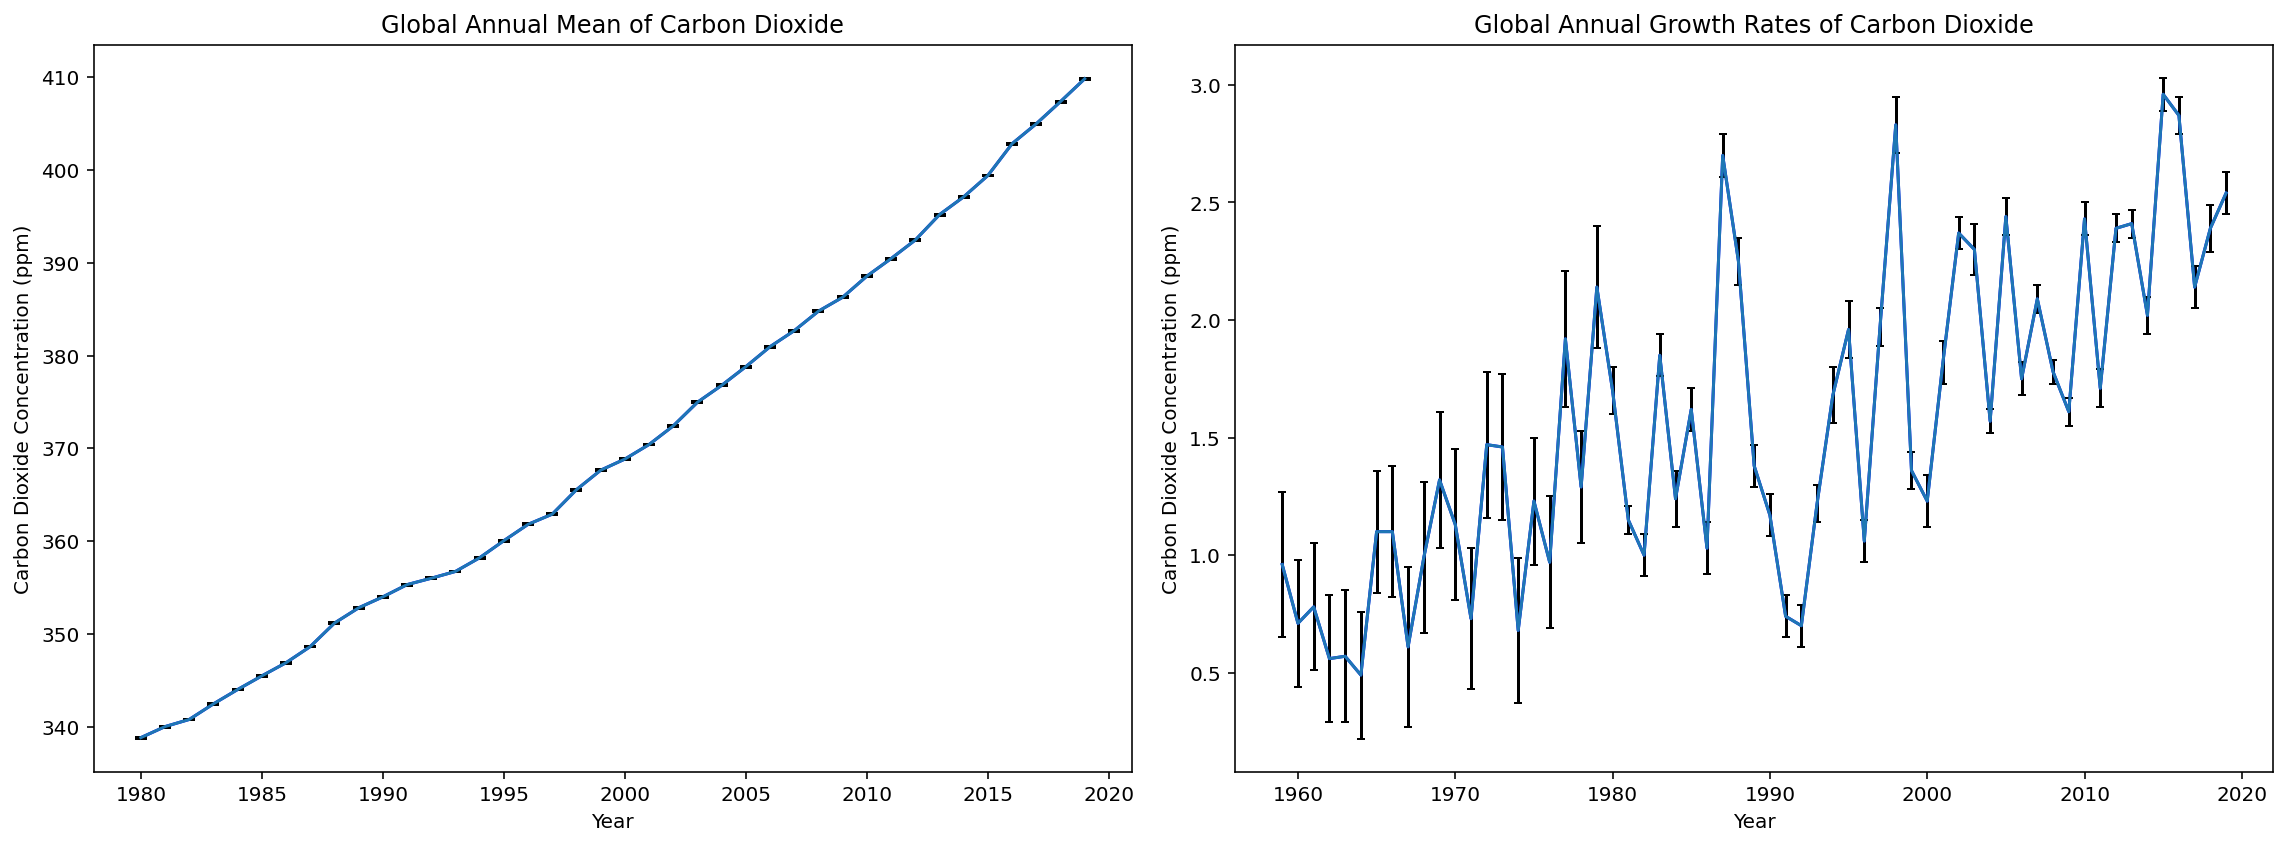

In [13]:
fig, axes = plt.subplots(ncols = 2, figsize= (16,6))

co2_data.Mean_CO2.plot(ax=axes[0], color = 'blue', xlabel = 'Years', ylabel ='Carbon Dioxide Concentration (ppm)',
                       title = 'Global Annual Mean of Carbon Dioxide')
co2_data.Mean_CO2.plot(ax=axes[0], yerr = co2_data.Unc_CO2, capsize =3, capthick = 1, ecolor = 'black')

co2_data.Growth_Rates.plot(ax=axes[1], color = 'blue', xlabel = 'Years', ylabel ='Carbon Dioxide Concentration (ppm)',
                       title = 'Global Annual Growth Rates of Carbon Dioxide')
co2_data.Growth_Rates.plot(ax=axes[1], yerr = co2_data.Unc_GR, capsize = 2, capthick = 1, ecolor = 'black')

plt.tight_layout()
plt.show()

## Part 3: The Global Sea Surface Temperature, 1960 - 2019 

#### Load the Sea Surface Temperature Data, 1960 - 2019

In [14]:
# Load the SST data and use slice to select the period from 1960 to now

url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])
ds = ds.sel(time=slice('1960', None)).load()

#### Calculate the Sea Surface Temperature Anomalies

In [15]:
# Calculate the SST anomaly for all dataset 
gb = ds.groupby('time.month')
ds_anom = gb - gb.mean(dim='time')

# Calculate the mean SST anomaly in 1960
ds1 = ds_anom.loc[dict(time= slice('1960-01-01','1960-12-01'))]
ds1_m = ds1.sst.mean(dim='time')

# Calculate the mean SST anomaly in 2019
ds2 = ds_anom.loc[dict(time= slice('2019-01-01','2019-12-01'))]
ds2_m = ds2.sst.mean(dim='time')

# Calculate the difference in the mean SST anomalies between 1960 and 2019
ds12_diff = ds2_m - ds1_m

# Calculate the difference in the SST anomalies in summer and winter time between 1960 and 2019
summer_diff = (ds_anom.sel(time='2019-07-01') - ds_anom.sel(time='1960-07-01'))
winter_diff = (ds_anom.sel(time='2019-01-01') - ds_anom.sel(time='1960-01-01'))

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


#### Plot the Sea Surface Temperature Anomalies

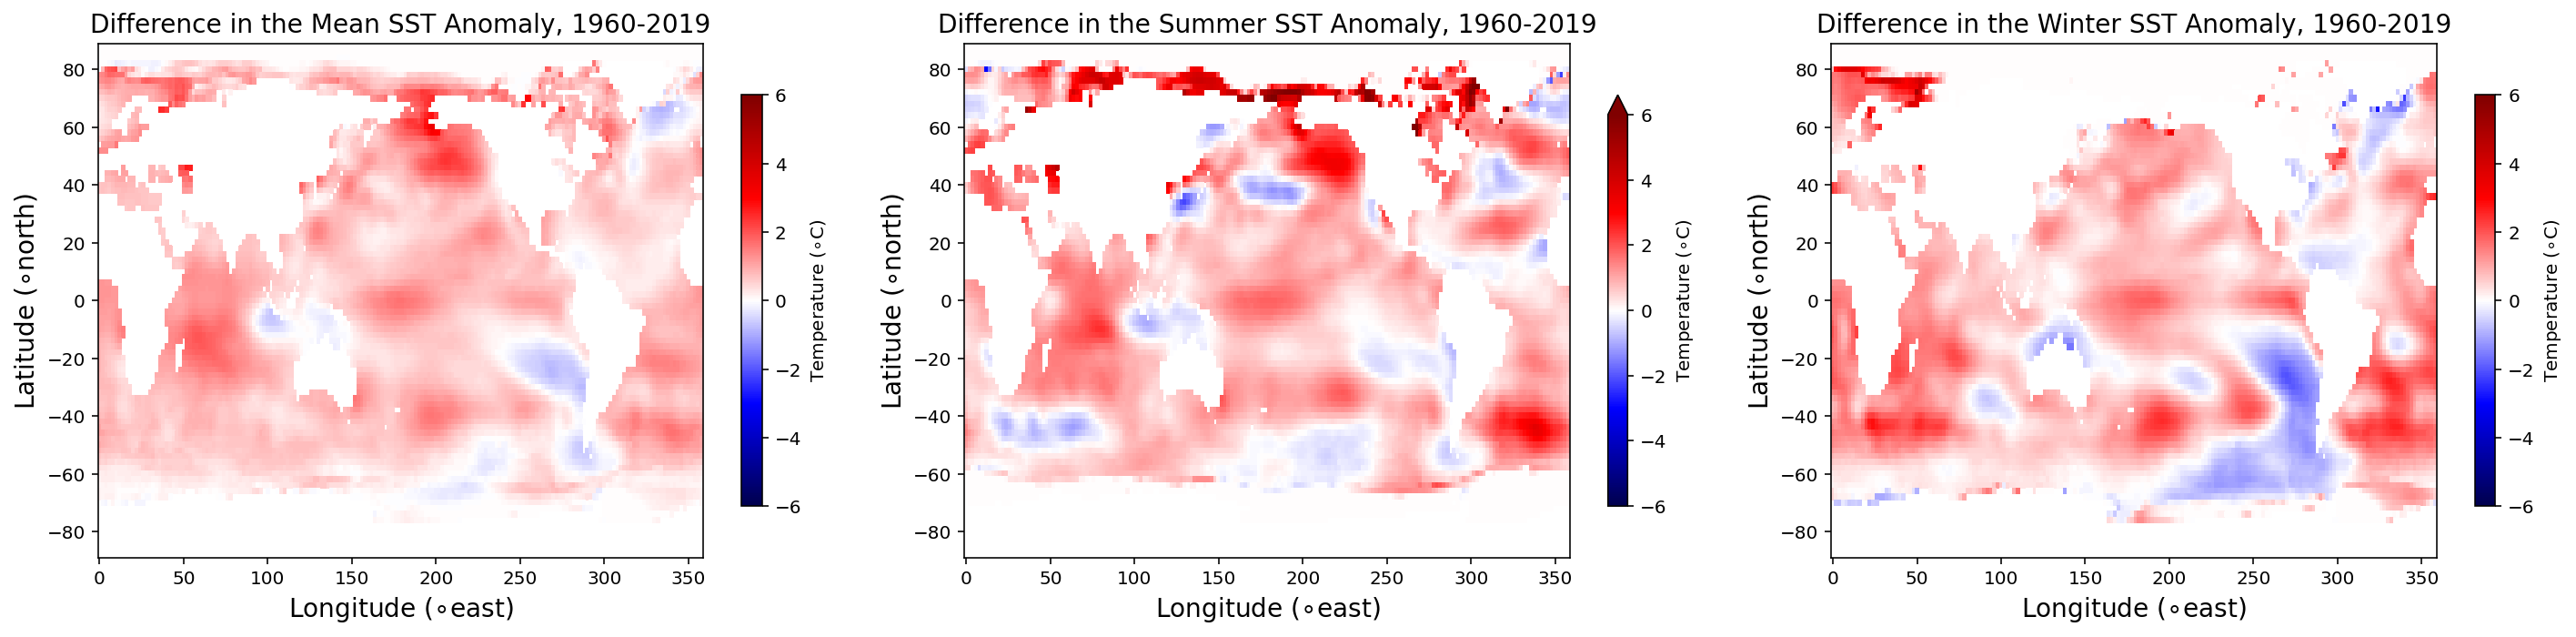

In [16]:
# Plot the SST Anomaly in the period 1960-2019

fig, axes = plt.subplots(ncols = 3, figsize= (20,5))

ds12_diff.plot(ax = axes[0], cbar_kwargs = {'shrink': 0.8, 'label':'Temperature ($\circ$C)'}, cmap = 'seismic', vmin = -6, vmax = 6)
axes[0].set_title('Difference in the Mean SST Anomaly, 1960-2019', size = 14)
axes[0].set_xlabel('Longitude ($\circ$east)', size = 14)
axes[0].set_ylabel('Latitude ($\circ$north)', size = 14)


summer_diff.sst.plot(ax = axes[1], cbar_kwargs = {'shrink': 0.8, 'label':'Temperature ($\circ$C)'}, cmap = 'seismic', vmin = -6, vmax =6)
axes[1].set_title('Difference in the Summer SST Anomaly, 1960-2019', size = 14)
axes[1].set_xlabel('Longitude ($\circ$east)', size = 14)
axes[1].set_ylabel('Latitude ($\circ$north)', size = 14)

winter_diff.sst.plot(ax = axes[2], cbar_kwargs = {'shrink': 0.8, 'label':'Temperature ($\circ$C)'}, cmap = 'seismic',  vmin = -6, vmax =6)
axes[2].set_title('Difference in the Winter SST Anomaly, 1960-2019', size = 14)
axes[2].set_xlabel('Longitude ($\circ$east)', size = 14)
axes[2].set_ylabel('Latitude ($\circ$north)', size = 14)

plt.tight_layout()
plt.show()

## Part 4: The Sea Ice Extent of Northern and Southern Hemispheres, 1979 - 2020

#### Load the Sea Ice Extent Data, 1979 - 2020 

In [23]:
# Load the data of Sea Ice Northern Hemisphere in February
sinf = pd.read_csv('sea_ice_northern_Feb.csv', skiprows = [0,1,2,3],
                     names = ['Year','Extent_NH_Feb', 'Anomaly_NH_Feb'])
df_sinf = pd.DataFrame(sinf)
df_sinf = df_sinf.set_index('Year')

# Load the data of Sea Ice Northern Hemisphere in August
sina = pd.read_csv('sea_ice_northern_Aug.csv', skiprows = [0,1,2,3],
                     names = ['Year','Extent_NH_Aug', 'Anomaly_NH_Aug'])
df_sina = pd.DataFrame(sina)
df_sina = df_sina.set_index('Year')

# Merge two datasets of Sea Ice in Northern Hemisphere
df_nh = df_sinf.join(df_sina, how = 'right')
df_nh.head()

,Extent_NH_Feb,Anomaly_NH_Feb,Extent_NH_Aug,Anomaly_NH_Aug
Year,,,,
1979,16.18,0.88,8.04,0.84
1980,15.96,0.66,7.98,0.78
1981,15.60,0.30,7.84,0.64
1982,15.97,0.67,8.14,0.94
1983,16.01,0.71,8.19,0.99


In [22]:
# Load the data of Sea Ice Southern Hemisphere in February
sisf = pd.read_csv('sea_ice_southern_Feb.csv', skiprows = [0,1,2,3],
                     names = ['Year','Extent_SH_Feb', 'Anomaly_SH_Feb'])
df_sisf = pd.DataFrame(sisf)
df_sisf = df_sisf.set_index('Year')

# Load the data of Sea Ice Southern Hemisphere in August
sisa = pd.read_csv('sea_ice_southern_Aug.csv', skiprows = [0,1,2,3],
                     names = ['Year','Extent_SH_Aug', 'Anomaly_SH_Aug'])
df_sisa = pd.DataFrame(sisa)
df_sisa = df_sisa.set_index('Year')

# Merge two datasets of Sea Ice in Southern Hemisphere
df_sh = df_sisf.join(df_sisa, how ='right')
df_sh.head()

,Extent_SH_Feb,Anomaly_SH_Feb,Extent_SH_Aug,Anomaly_SH_Aug
Year,,,,
1979,3.14,0.07,17.70,-0.02
1980,2.82,-0.25,17.81,0.09
1981,2.87,-0.20,17.74,0.02
1982,3.13,0.06,17.79,0.07
1983,3.07,0.00,17.25,-0.47


In [19]:
# Merge two datasets of Sea Ice in both Hemispheres
df_si = pd.concat([df_nh, df_sh], axis =1)
df_si.head()

,Extent_NH_Feb,Anomaly_NH_Feb,Extent_NH_Aug,Anomaly_NH_Aug,Extent_SH_Feb,Anomaly_SH_Feb,Extent_SH_Aug,Anomaly_SH_Aug
Year,,,,,,,,
1979,16.18,0.88,8.04,0.84,3.14,0.07,17.70,-0.02
1980,15.96,0.66,7.98,0.78,2.82,-0.25,17.81,0.09
1981,15.60,0.30,7.84,0.64,2.87,-0.20,17.74,0.02
1982,15.97,0.67,8.14,0.94,3.13,0.06,17.79,0.07
1983,16.01,0.71,8.19,0.99,3.07,0.00,17.25,-0.47


#### Plot the Sea Ice Extent Data for the Northern and Southern Hemispheres, 1979 - 2020

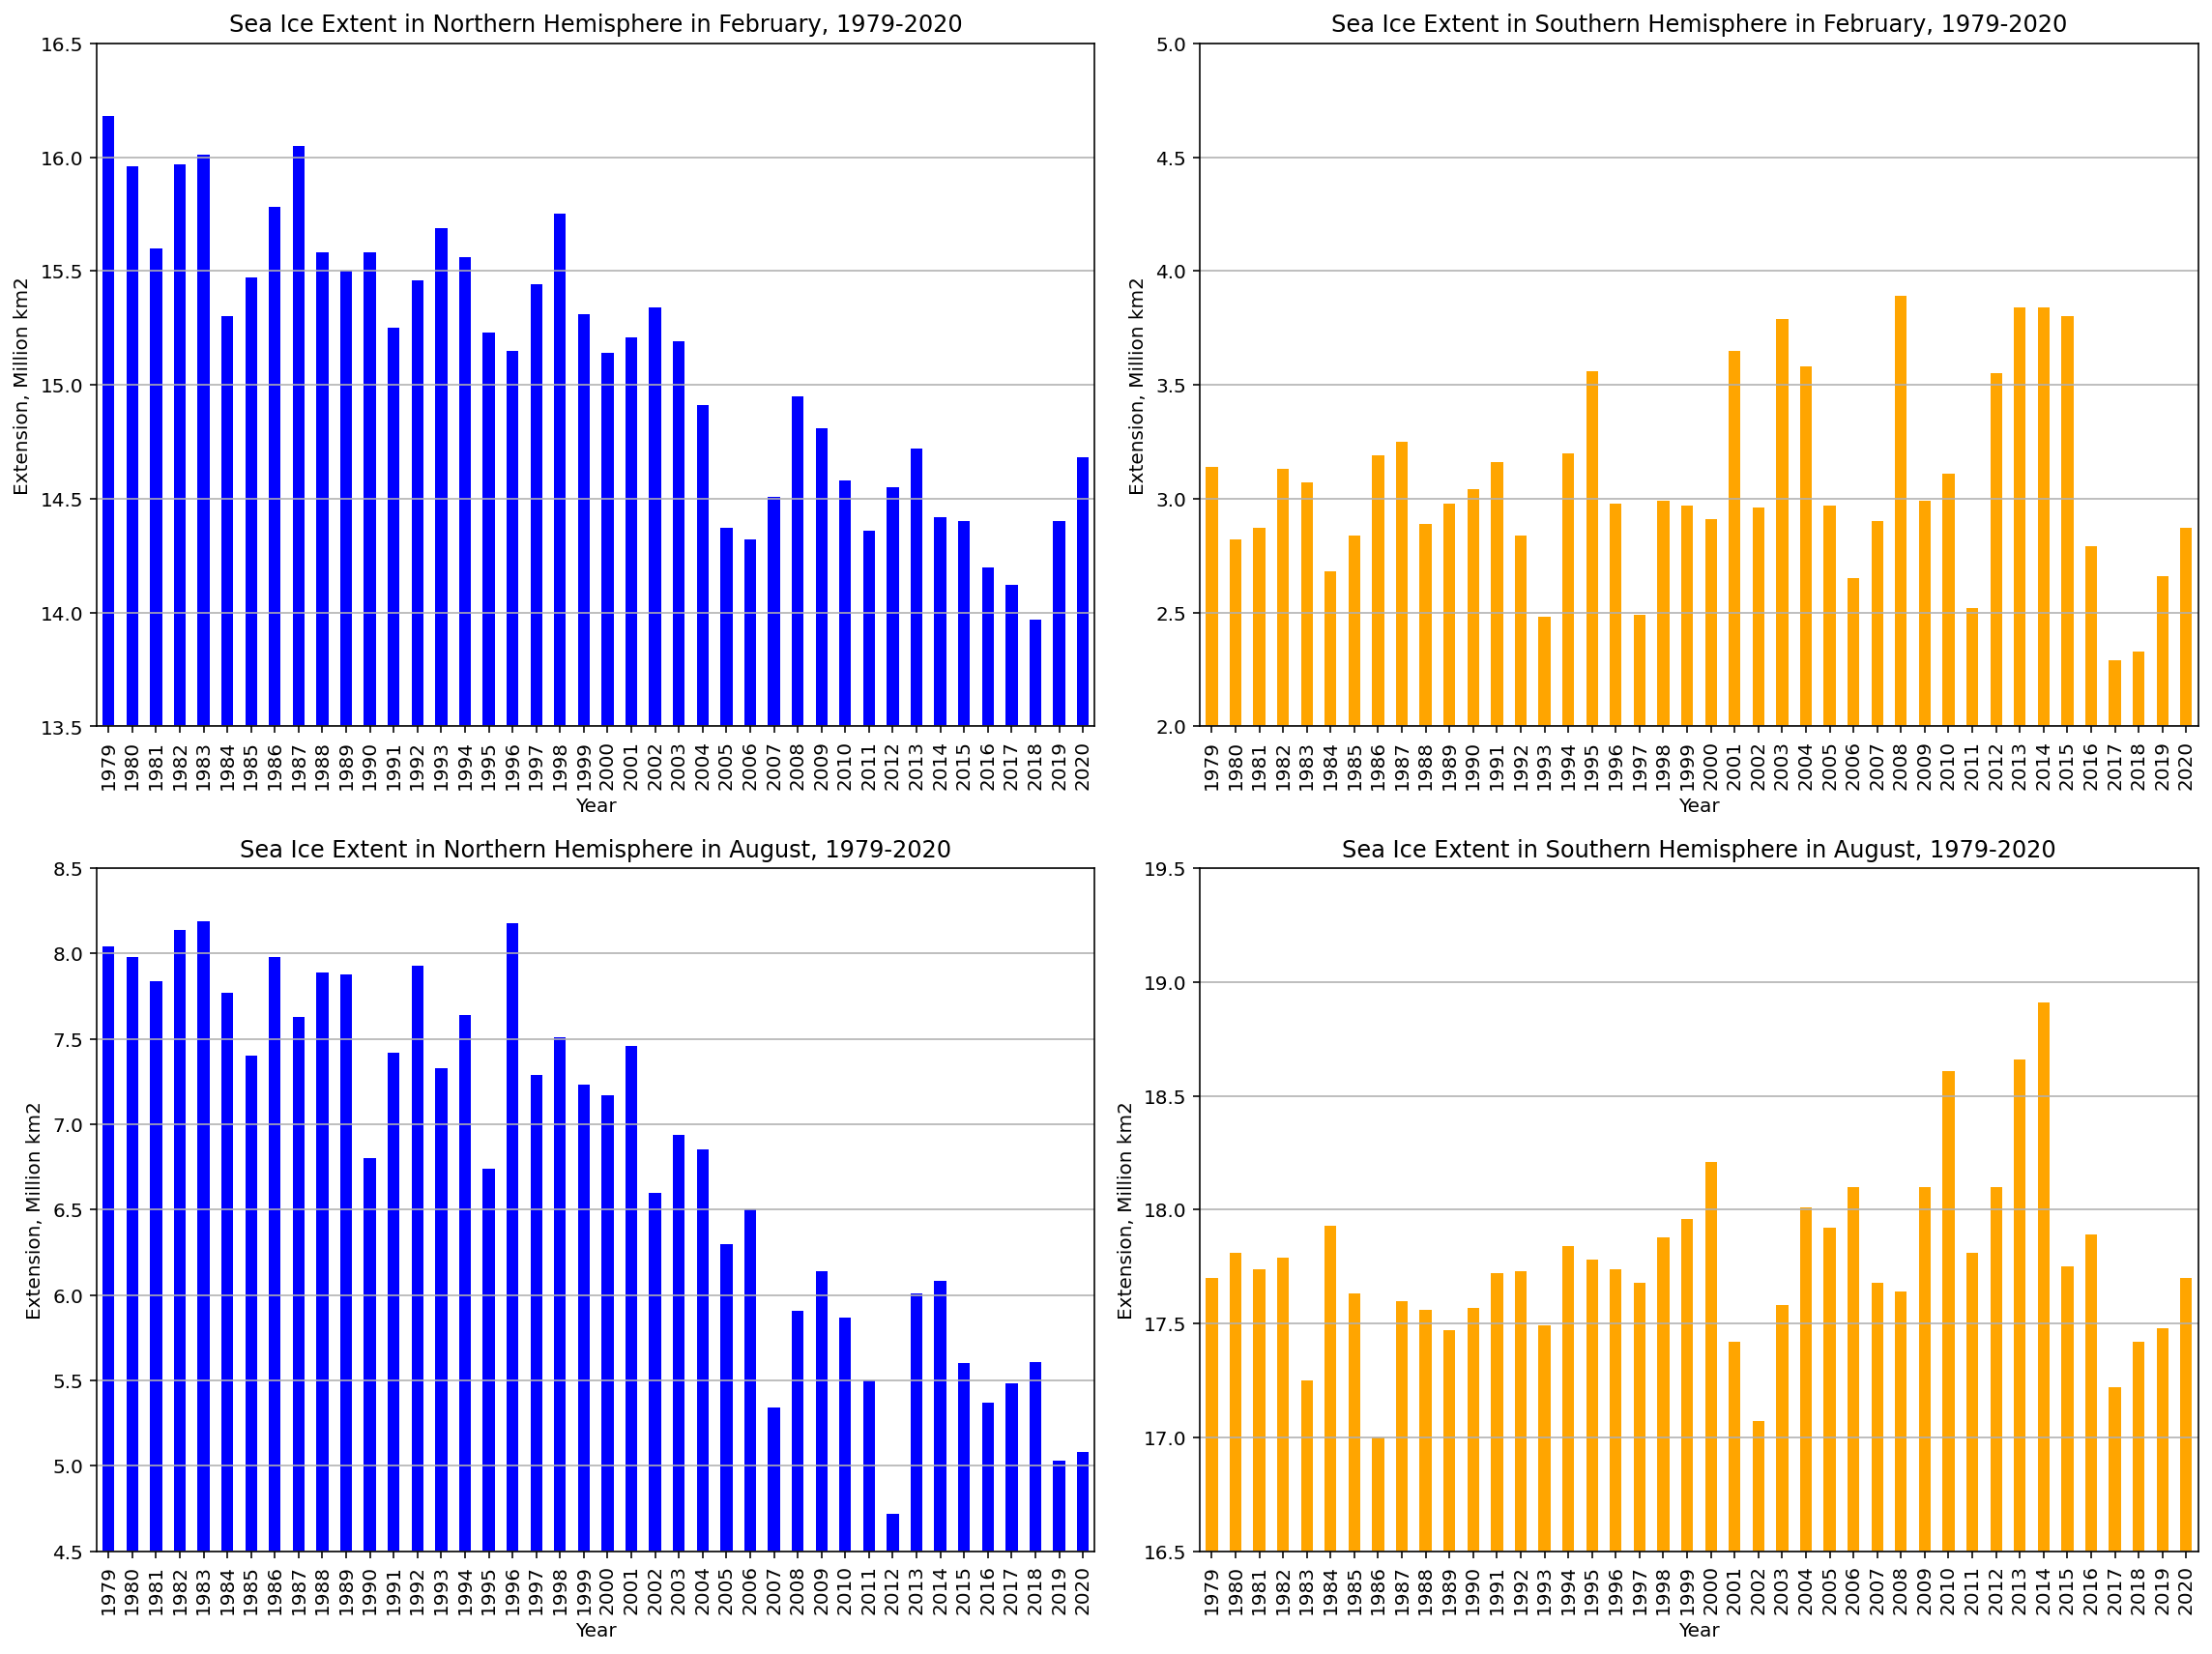

In [20]:
# Plot the Sea Ice Extent in the period 1979-2020
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize= (16,12))

df_si.Extent_NH_Feb.plot(ax=axes[0,0], kind = 'bar', xlabel = 'Year', ylabel = 'Extension, Million km2', ylim =(13.5,16.5), xlim = (1979,2020),
                    color = 'blue', title='Sea Ice Extent in Northern Hemisphere in February, 1979-2020').grid(axis='y')

df_si.Extent_NH_Aug.plot(ax=axes[1,0], kind = 'bar', xlabel = 'Year', ylabel = 'Extension, Million km2', ylim =(4.5,8.5),
                    color = 'blue', title='Sea Ice Extent in Northern Hemisphere in August, 1979-2020').grid(axis='y')

df_si.Extent_SH_Feb.plot(ax=axes[0,1], kind = 'bar', xlabel = 'Year', ylabel = 'Extension, Million km2', ylim =(2.0,5.0),
                    color = 'orange', title='Sea Ice Extent in Southern Hemisphere in February, 1979-2020').grid(axis='y')

df_si.Extent_SH_Aug.plot(ax=axes[1,1], kind = 'bar', xlabel = 'Year', ylabel = 'Extension, Million km2', ylim =(16.5,19.5),
                    color = 'orange', title='Sea Ice Extent in Southern Hemisphere in August, 1979-2020').grid(axis='y')

plt.tight_layout()
plt.show()